#### 지도학습(Supervised Learning) : 정답을 알려주며 학습하는 것.
 - 고양이 사진을 주고(input data), 이 사진은 고양이(정답지 - label data)야.
 - 사자 사진을 주고, 이 사진은 사자야. 라고 알려주는 학습 방식
 
 - 회귀 : 어떤 데이터들의 특징(feature)을 토대로 값을 예측
 - 분류 : 이진 분류, 다중 분류
  - K-최근접 이웃(k-Nearest Neigbors)
  - 선형회귀(Linear Regression)
  - 로지스틱 회귀(Logistic Regression)
  - 서포트 벡터 머신(SVM, Support Vector Machine)
  - 결정 트리(Decision Tree)와 랜덤 포레스트(Random Forest)
  - 신경망 (Neural Network)
  
#### 비지도학습(Unsupervised Learning) : 정답을 알려주지 않고(label 없음), 비슷한 데이터들을 군집화

 - 군집화, 동물이 '무엇' 이라고 기계가 정의는 할 수 없지만 비슷한 단위로 군집화
 
#### 강화학습(Reinforcement Learning) 
 - 상과 벌이라는 보상(reward)을 주며 상을 최대화 하고 벌을 최소화 하도록 강화 학습하는 방식

#### 회귀선 : 주어진 데이터를 대표하는 하나의 직선
#### 회귀식 : 회귀선을 함수로 표현한 것
#### 단순선형 회귀분석 : y = wx + b인 회귀식에서 x가 1개
#### 잔차 : 관측값의 y와 예측값의 y간의 차이
#### 최소제곱법 : 잔차의 제곱의 합이 최소가 되도록 회귀계수를 구함

# 회귀
- 소득이 증가하면 소비도 증가. 어떤 변수가 다른 변수에 영향을 준다면 두 변수 사이에 선형관계가 있따고 할 수 있음.
- 두 변수 사이에 일대일로 대응되는 학률적, 통계적 상관성을 찾는 알고리즘을 Simple Linear Regression이라고 함. 지도학습
- 변수 X와 Y에 대한 정보를 가지고 일차 방정식의 계수 a, b를 차즌 과정이 단순회귀분석 알고리즘

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# df = pd.read_csv('auto-mpg.csv', header=None)
df = pd.read_csv('auto-mpg.csv')
df.columns = ['mpg','cylinders','displacement','horsepower', 'weight','acceleration','model year','origin','name']
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
1,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
2,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
3,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
4,15.0,8,429.0,198.0,4341.0,10.0,70,1,ford galaxie 500


In [3]:
# horsepower 열의 자료형 변경 (문자열 → 숫자)
df['horsepower'].replace('?', np.nan, inplace=True) # '?'dnf np.nan으로 변경
df.dropna(subset=['horsepower'], axis=0, inplace=True) # 누락데이터 행을 삭제
df['horsepower'] = df['horsepower'].astype('float')
# 저장
df.to_pickle('auto-mpg.pkl')
# 분석에 활용할 열(속성)을 선택 (연비, 실린더, 출력, 중량)
ndf = df[['mpg', 'cylinders', 'horsepower', 'weight']]
display(ndf.head())

,mpg,cylinders,horsepower,weight
0,15.0,8,165.0,3693.0
1,18.0,8,150.0,3436.0
2,16.0,8,150.0,3433.0
3,17.0,8,140.0,3449.0
4,15.0,8,198.0,4341.0


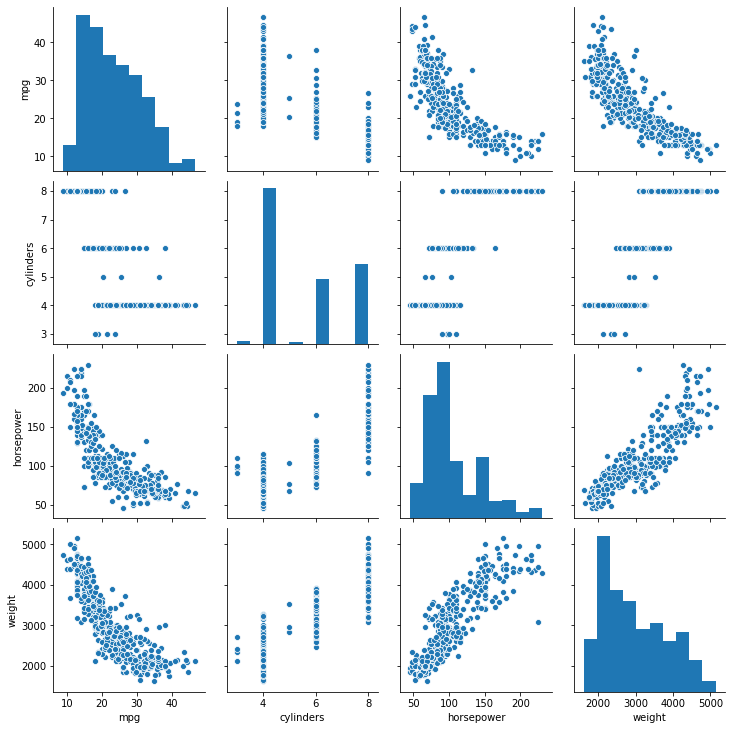

In [4]:
# seaborn pairplot으로 두 변수 간의 모든 경우의 수 그리기
sns.pairplot(ndf)
plt.show()
plt.close() # plt 객체에 표가 저장되어있다가 나중에 사용할때 저 표가 다시 튀어나올수도있어서 한번쓰고 종료

In [5]:
# 속성(변수) 선택
X = ndf[['weight']] # 독립 변수 X
y = ndf['mpg'] # 종속 변수 y

# train data와 test data로 구분(7:3 비율)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, # 독립 변수
                                                    y, # 종속 변수
                                                    test_size=0.3, # 검증 30%
                                                    random_state=10) # 랜덤 추출(_seed를 고정)
print('train data 개수: ', len(X_train))
print('test data 개수: ', len(X_test))
print((274 + 118) * 0.7)
print((274 + 118) * 0.3)

train data 개수:  273
test data 개수:  118
274.4
117.6


In [6]:
# sklearn 라이브러리에서 선형회귀분석 모듈 가져오기
from sklearn.linear_model import LinearRegression   # 알고리즘(단순선형회귀) 임포트

# 단순회귀분석 모형 객체 생성 (Simple Linear Regression) - 상황에 따라 알맞는 모델을 사용해야 한다.
lr = LinearRegression()

# train data를 가지고 모형 학습
lr.fit(X_train, y_train) # 학습용 데이터로 fit 시킨다(학습시킨다). 독립변수와 종속변수를 이용하여 학습
# 학습을 해서 오차를 최소로 하는 y=ax+b 에서 a, b를 찾아준다.
# 학습된 데이터는 lr에 저장

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [7]:
# 학습을 마친 모형에 test data를 적용하여 결정계수(R-제곱) 계산
# 결정계수 값이 ㅋ르수록 모형의 예측 성능이 좋다고 판단
# 회귀모델에 대한 평가 : MSE, RMSE, R_Square

r_square = lr.score(X_test, y_test) # score를 통해 점수를 계산해서 정확도 검증(검증용 데이터를 넣어서 검증) _예측 모델의 설명력의 정도를 판단
print(r_square) # 이 모델에서는 r스퀘어를 사용한다. (설명력이 얼마나 있는지 판단.- 비교적 간단하기 때문에 r_square 사용.)
# 분산의 크기를 가지고 평가.

0.7035812683047353


In [8]:
# 회귀식의 기울기
print('기울기 a: ', lr.coef_)

# 회귀식의 y절편
print('y절편 b: ', lr.intercept_)

# 모형에 전체 X 데이터를 입력하여 예측한 값 y_hat을 실제 값 y와 비교
y_hat = lr.predict(X) # lr을 이용해서 X를 대입했을 때 예측

기울기 a:  [-0.00770318]
y절편 b:  46.60392617148081


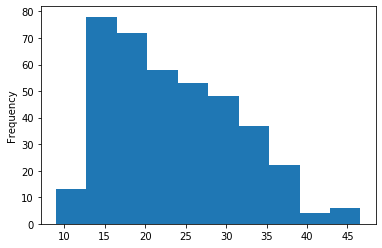

In [9]:
y.plot(kind='hist') # y값에 대한 히스토그램 (실제 y값) y=ndf['mpg']

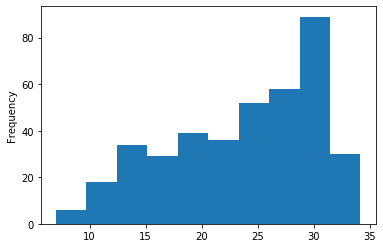

In [10]:
y_hat = pd.Series(y_hat) #_???
type(y_hat)
y_hat.plot(kind='hist')  # 실제 분포(y)하고 예측해서 나온 값(y_hat)을 비교

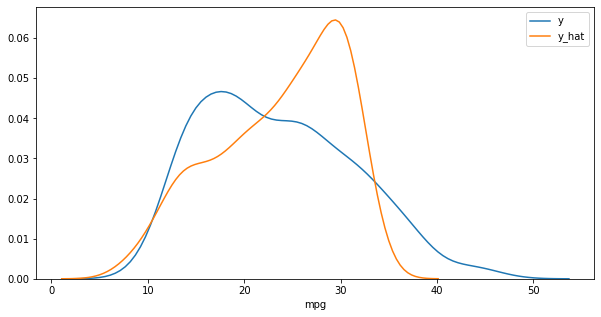

In [11]:
# 실제 값은 왼쪽으로 편향되어 있고 예측값은 반대로 오른쪽으로 편증되는 경향을 보임.
# 모형의 오차를 줄일 필요있어 보임
plt.figure(figsize=(10, 5))
ax1 = sns.distplot(y, hist=False, label="y")
# ax2 = sns.distplot(y_hat, hist=False, label="y_hat", ax=ax1)
ax2 = sns.distplot(y_hat, hist=False, label="y_hat")
plt.show()
plt.close()

# 다항 회귀분석
 - 직선보다 곡선으로 설명하는 것이 적합할 경우 다항 함수를 사용하면 복잡한 곡선 형태의 회귀선을 표현할 수 있음
 - 2차 함수 이상의 다항 함수를 이용하여 두 변수 간의 선형관계를 설명화는 알고리즘
 - 다항 회귀도 선형회귀임. 선형/비선형 회귀를 나누는 기준은 회귀계수가 선형/비선형인지에 따르며 독립변수의 선형/비선형 여부와는 무관

In [12]:
# ndf 데이터를 train data와 test data로 구분(7:3 비율)
X = ndf[['weight']] # 독립 변수 X
y = ndf[['mpg']] # 종속 변수 y

# train data와 test data로 구분(7:3 비율)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

print('훈련 데이터: ', X_train.shape)
print('검증 데이터: ', X_test.shape)
print('훈련 데이터: ', y_train.shape)
print('검증 데이터: ', y_test.shape)
X_train

훈련 데이터:  (273, 1)
검증 데이터:  (118, 1)
훈련 데이터:  (273, 1)
검증 데이터:  (118, 1)


,weight
276,3410.0
282,3265.0
356,2615.0
341,2385.0
289,4054.0
...,...
375,2025.0
322,2800.0
15,2774.0
127,3336.0


In [13]:
# 다항회귀분석 모형 - sklearn 사용

# sklearn 라이브러리에서 필요한 모듈 가져오기
from sklearn.linear_model import LinearRegression # 선형회귀분석
from sklearn.preprocessing import PolynomialFeatures # 다항식 변환

# 다항식 변환
poly = PolynomialFeatures(degree=2) # 2차항 적용
X_train_poly = poly.fit_transform(X_train) # X_train 데이터를 2차항으로 변환

print('원 데이터: ', X_train.shape)
print('2차항 변환 데이터: ', X_train_poly.shape)
X_train_poly

원 데이터:  (273, 1)
2차항 변환 데이터:  (273, 3)


array([[1.0000000e+00, 3.4100000e+03, 1.1628100e+07],
       [1.0000000e+00, 3.2650000e+03, 1.0660225e+07],
       [1.0000000e+00, 2.6150000e+03, 6.8382250e+06],
       [1.0000000e+00, 2.3850000e+03, 5.6882250e+06],
       [1.0000000e+00, 4.0540000e+03, 1.6434916e+07],
       [1.0000000e+00, 2.2100000e+03, 4.8841000e+06],
       [1.0000000e+00, 2.9010000e+03, 8.4158010e+06],
       [1.0000000e+00, 2.1640000e+03, 4.6828960e+06],
       [1.0000000e+00, 3.1580000e+03, 9.9729640e+06],
       [1.0000000e+00, 4.0800000e+03, 1.6646400e+07],
       [1.0000000e+00, 1.9400000e+03, 3.7636000e+06],
       [1.0000000e+00, 2.0030000e+03, 4.0120090e+06],
       [1.0000000e+00, 2.4050000e+03, 5.7840250e+06],
       [1.0000000e+00, 2.5750000e+03, 6.6306250e+06],
       [1.0000000e+00, 4.2090000e+03, 1.7715681e+07],
       [1.0000000e+00, 2.9450000e+03, 8.6730250e+06],
       [1.0000000e+00, 2.6780000e+03, 7.1716840e+06],
       [1.0000000e+00, 1.9650000e+03, 3.8612250e+06],
       [1.0000000e+00, 2.200

In [14]:
# train data를 가지고 모형 학습
pr = LinearRegression()
pr.fit(X_train_poly, y_train)

# 학습을 마친 모형에 test data를 적용하여 결정계수(R-제곱)
# 설계한 모형의 오차가 작다면 R-square가 커지고, 설계한 모형의 오차가 크다면 R-square가 작아짐

X_test_poly = poly.fit_transform(X_test) # X_test 데이터를 2차항으로 변형
r_square = pr.score(X_test_poly, y_test)
print(r_square)

0.7337822241594427


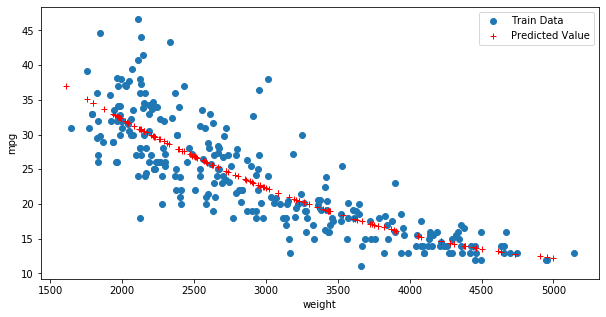

In [15]:
# train data의 산점도와 test data로 예측한 회귀선을 그래프로
y_hat_test = pr.predict(X_test_poly) # 다항으로 바꾼 검증용 데이터를 가지고 예측한 값을 y_hat_test에 저장

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
ax.plot(X_train, y_train, 'o', label='Train Data') # 데이터 분포
ax.plot(X_test, y_hat_test, 'r+', label='Predicted Value') # 모형이 학습한 회귀선
ax.legend(loc='best')
plt.xlabel('weight')
plt.ylabel('mpg')
plt.show()
plt.close()
# 하나의 그래프를 만들어준다.
# 학습용 데이터를 그래프로 그려준다.

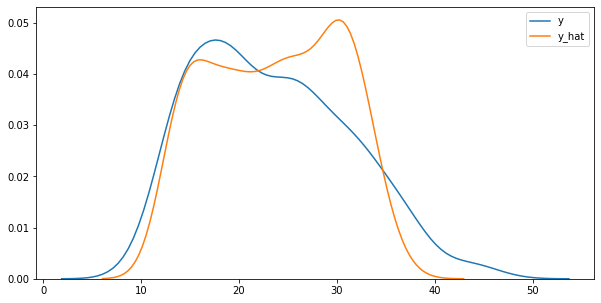

In [16]:
# 모형에 전체 X 데이터를 입력하여 예측한 값 y_hat을 실제 값 y와 비교
# 단순 회귀분석 결과와 비교하면 데이터가 어느 한쪽으로 편향되는 경향이 상당히 감소한 것을 확인
X_poly = poly.fit_transform(X)
y_hat = pr.predict(X_poly)

plt.figure(figsize=(10,5))
ax1 = sns.distplot(y, hist=False, label='y')
ax2 = sns.distplot(y_hat, hist=False, label='y_hat', ax=ax1)
plt.show()
plt.close()

# 회귀 평가 지표
- MAE: 실제값과 예측값의 차이를 절대값으로 변환해 평균한 것
- MSE: 실제값과 예측값의 차이를 제곱해 평균한 것
- RMSE: MSE에 루트를 씌운 것(실제 오류 평균보다 커지는 것 보정)
- R square: 분산 기반으로 예측 성능을 평가, 실제값의 분산 대비 예측값의 분산 비율을 지표로 함.

# 분류(DT, RF, LR)
 - Decision Tree : 의사결정 나무라는 의미, 트리 구조를 사용, 각 분기점(node)에는 분석 대상의 속성들이 위치
   - 각 분기점마다 목표 값을 잘 분류할 수 있는 속성을 찾아서 배치
   - 해당 속성이 갖는 값을 이용하여 새로운 가지(branch)를 만듦
   - 최적의 속성을 선택할 때는 다른 종류의 값들이 섞여 있는 정도를 나타내는 Entropy를 주로 활용
   - Entropy가 낮을수록 분류가 잘 된 것임.

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# 붓꽃 데이터를 로딩하고 학습과 테스트 데이터 세트로 분리
iris_data = load_iris()
iris_data.keys()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=11)
print(iris_data.feature_names)
print(iris_data.target_names)

# DecisionTree Classifier 생성 _분류기
# dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf = DecisionTreeClassifier(criterion='gini', max_depth=2, random_state=156)
# dt_clf = DecisionTreeClassifier(criterion='gini',min_samples_split=4, random_state=156)
# dt_clf = DecisionTreeClassifier(criterion='gini',min_samples_leaf=4, random_state=156)

# DecisionTreeClassifier 학습
dt_clf.fit(X_train, y_train)
# 학습된 모델 dt_clf로 예측 수행
y_hat = dt_clf.predict(X_test)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


### Dicision Tree 파라미터
 - max_depth : 트리의 최대 깊이
 - max_features : 최적의 분할을 위해 고려할 최대 피처 개수
 - max_leaf_nodes : 말단 노드의 최대 개수
 - min_samples_split : 노드를 분할하기 위한 최소한의 샘플 데이터, 디폴트 2. 작게 설정할 수록 분할되는 노드 증가, 과적합 가능성 증가
 - min_samples_leaf : 말단 노드가 되기 위한 최소한의 샘플 데이터

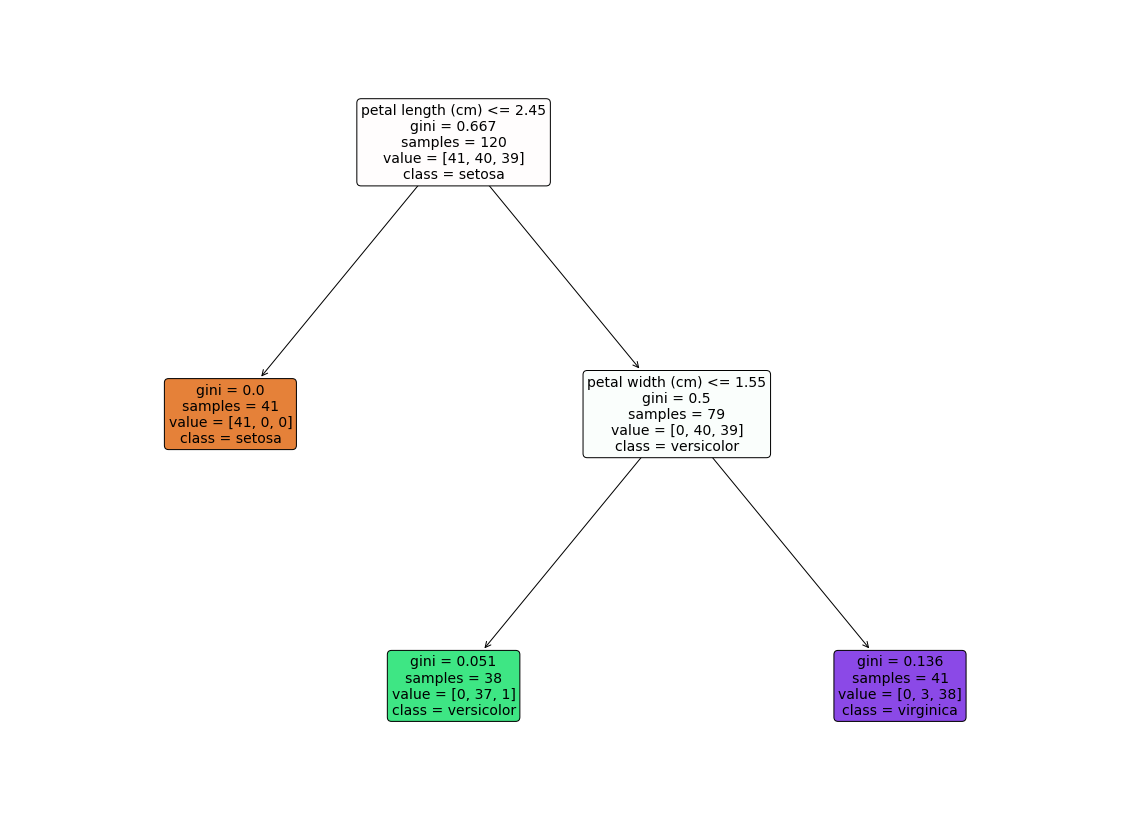

In [18]:
# DT 시각화
from sklearn import tree
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(20,15))
tree.plot_tree(dt_clf, filled=True,
              feature_names=iris_data.feature_names,
              class_names=iris_data.target_names,
              rounded=True, fontsize=14)
plt.show()
plt.close()

In [19]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', 15)

titanic_df = pd.read_csv('titanic3.csv')

# display(titanic_df.head(),'상단 표 : 기본데이터')
# display(titanic_df.info(),'INFORMATION')
from sklearn.preprocessing import LabelEncoder
# Null 처리 함수
def fillna(df):
    df['age'].fillna(df['age'].mean(), inplace=True)
    df['cabin'].fillna('N', inplace=True)
    df['embarked'].fillna('N', inplace=True)
    df['fare'].fillna(df['fare'].mean(), inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 속성 제거(PassengerId, Name, Ticket)
def drop_features(df):
    df.drop(['name','ticket','boat','body', 'home.dest'], axis=1, inplace=True)
    return df

# 레이블 인코딩
def format_features(df):
    df['cabin'] = df['cabin'].str[:1]
    features = ['cabin','sex','embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.fit_transform(df[feature])
    return df

# 앞에서 설정한 Data Preprocessing 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df


t_df = transform_features(titanic_df)
display(t_df.head())
print(t_df.columns.values)

t_df.to_pickle('t_df.pkl')

,pclass,survived,sex,age,sibsp,parch,fare,cabin,embarked
0,1,1,0,29.00,0,0,211.3375,1,3
1,1,1,1,0.92,1,2,151.5500,2,3
2,1,0,0,2.00,1,2,151.5500,2,3
3,1,0,1,30.00,1,2,151.5500,2,3
4,1,0,0,25.00,1,2,151.5500,2,3


['pclass' 'survived' 'sex' 'age' 'sibsp' 'parch' 'fare' 'cabin' 'embarked']


In [20]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# 독립변수, 종속변수 분리
X = t_df[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'cabin', 'embarked']]
y = t_df['survived']

# 독립변수 정규화(평균 0, 분산 1인 표준정규분포)
X = preprocessing.StandardScaler().fit(X).transform(X)

# 학습용 데이터와 평가용 데이터를 8:2로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

print(X_train.shape)
print(X_test.shape)
print()
print(X.mean())
print(X.std())
print(type(y_test))

(1047, 8)
(262, 8)

-4.885320566723378e-17
1.0
<class 'pandas.core.series.Series'>


In [21]:
# Decision Tree
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier() # 객체 생성
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test) # 검증용 데이터로 예측

print(dt_pred[0:10])
print(y_test.values[0:10])

accuracy = accuracy_score(y_test, dt_pred)
print('dt 예측 정확도: ', accuracy) # 분석용 데이터셋을 잘 만들어서, 중요한 변수들을 뽑아내야 함.

[0 1 0 0 0 0 0 1 0 0]
[1 0 0 1 0 0 0 1 1 0]
dt 예측 정확도:  0.7404580152671756


In [22]:
# Random Forest (투표를 해가며 결정해가는 방법)
from sklearn.ensemble import RandomForestClassifier # (분류기)

rf_model = RandomForestClassifier() # 객체 생성
rf_model.fit(X_train, y_train) # 학습을 시킨다. (트레이닝 데이터를 이용)
rf_pred = rf_model.predict(X_test) # 학습시킨 모델을 통해 예측한다. (검증용 데이터로)

rf_accuracy = accuracy_score(y_test, rf_pred) # 예측한 것과 실제 y값으로 비교해서 예측 정확도를 구한다.
print('rf 예측 정확도: ', rf_accuracy)

rf 예측 정확도:  0.7938931297709924


In [23]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

lr_accuracy = accuracy_score(y_test, lr_pred)
print('lr 예측 정확도: ', lr_accuracy)

lr 예측 정확도:  0.7748091603053435


In [24]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

k_model = KNeighborsClassifier(n_neighbors=5) # (분류기)
k_model.fit(X_train, y_train)
k_pred = k_model.predict(X_test)

k_accuracy = accuracy_score(y_test, k_pred)
print('k 예측 정확도:', k_accuracy)

k 예측 정확도: 0.7709923664122137


In [25]:
# SVM
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score
from sklearn.metrics import classification_report
from sklearn import svm

# 벡터 공간으로 매핑하는 함수를 커널이라고 함
# kernal='rbf' 옵션으로 RBF(Radial Basis Function) 함수를 적용
svm_model = svm.SVC(kernel='rbf', random_state=0)
svm_model.fit(X_train, y_train)

s_pred = svm_model.predict(X_test)

s_accuracy = accuracy_score(y_test, s_pred)
print('s 정확도: ', s_accuracy)

s 정확도: 0.8015267175572519


### Q.'load_breast_cancer' 데이터 세트를 불러와서 다음 사항을 수행하게요.

from sklearn.datasets import load_breast_cancer  
cancer = load_breast_cancer()

- 데이터 세트의 구성 요소를 파악하고 feature의 개수를 구하세요.
- cancer.data를 데이터프레임으로 변환
- 정규화 수행
- 학습용 데이터와 검증용 데이터를 7:3의 비율로 구분
- Decision Tree, Logistic Regression, Random Forest 기법을 활용하여 분류 예측을 각각 수행

In [26]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

cancer = load_breast_cancer()
df_cancer = pd.DataFrame(cancer.data , columns=cancer.feature_names )
display(df_cancer.head()) # 30 columns
df_cancer.shape
cancer.target
pd.Series(cancer.target).value_counts()
cancer.target_names
len(cancer.feature_names)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,...,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,...,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,...,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,...,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,...,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,...,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


30

In [27]:
# 정규 분포 형태의 표준 스케일링 적용 후 train, test set 분리
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# MinmaxScaler 정규화(개별값/최대값)
# StandardScaler()로 평균이 0, 분산 1로 데이터 분포도 변환
scaler = StandardScaler() # 객체 생성
data_scaled = scaler.fit_transform(cancer.data) # 정규화

X_train, X_test, y_train, y_test = train_test_split(data_scaled, cancer.target, test_size=0.3, random_state=0)

In [28]:
# Decision Tree
# DecisionTreeClassifier를 이용해 학습 및 예측 수행
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=0)
dt_clf.fit(X_train, y_train)
dt_preds = dt_clf.predict(X_test)

# 모형 성능 평가
from sklearn.metrics import accuracy_score

dt_accuracy = accuracy_score(y_test, dt_preds)
print('dt 예측 정확도:', dt_accuracy)

dt 예측 정확도: 0.9122807017543859


In [29]:
# Logistic Regression
# 로지스틱 회귀를 이용해 학습 및 예측 수행
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(random_state=0)
lr_clf.fit(X_train, y_train)
lr_preds = lr_clf.predict(X_test)

# 모형 성능 평가
from sklearn.metrics import accuracy_score

lr_accuracy = accuracy_score(y_test, lr_preds)
print('lr 예측 정확도:', lr_accuracy)

lr 예측 정확도: 0.9766081871345029


In [30]:
# Random Forest
# 랜덤포레스트를 이용해 학습 및 예측 수행
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)     
rf_preds = rf_clf.predict(X_test) 

# 모형 성능 평가
from sklearn.metrics import accuracy_score

rf_accuracy = accuracy_score(y_test, rf_preds)
print('rf 예측 정확도:', rf_accuracy)

rf 예측 정확도: 0.9590643274853801


### 교차 검증
- KFold : K개의 데이터 폴드를 만들어서 K번 만큼 학습과 검증을 반복 수행(폴드 세트 설정, for 루프 반복 데이터 인덱스 추출, 반복 학습 수행 및 예측 성능 반환)
- Stratified KFold : 불균형한 분포도를 가진 레이블 데이터 집합을 위한 방식
    - K폴드의 경우 레이블 데이터 집합이 원본 데이터 집합의 레이블 분포를 제대로 분배 못하여 문제가 발생되는데 이 문제를 해결하기 위하여 사용
- cross_val_scores : KFold의 일련의 과정을 한꺼번에 수행해주는 API
    - 분류 모델의 경우 cvs는 내부적으로 Stratified KFold 방식으로 레이블 값의 분포에 따라 학습/테스트 세트를 분할

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 위에서 추가한 't_df.pkl'파일을 이용
# 독립변수, 종속변수 분리
t_df = pd.read_pickle('t_df.pkl')

y_df = t_df['survived']
X_df = t_df.drop('survived', axis=1)

# 학습용 평가용 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X_df,y_df, test_size=0.2, random_state=11)

# 분류기 객체 생성
dt_clf = DecisionTreeClassifier(random_state=11)
# rf_clf = RandomForestClassifier(random_state=11)
# lr_clf = LogisticRegression(random_state=11)

from sklearn.model_selection import KFold

# KFold 교차 검증 수행()
# K개의 데이터 폴드 세트를 만들어서 K번 만큼 각 포륻 세트에 학습과 검증 평가를 반복. K가 5이면 5번 평가를 평균한 결과로 예측 성능
def exec_kfold(clf, folds=5):
    kfold = KFold(n_splits=folds)
    scores = []

    for iter_count, (train_index, test_index) in enumerate(kfold.split(X_df)):
        X_train, X_test = X_df.values[train_index], X_df.values[test_index]
        y_train, y_test = y_df.values[train_index], y_df.values[test_index]

        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)

        print('교차 검증 {0} 정확도: {1:.4f}'.format(iter_count, accuracy))
    
    mean_score = np.mean(scores)
    print('평균 정확도: {0:.4f}'.format(mean_score))

exec_kfold(dt_clf, folds=5)

교차 검증 0 정확도: 0.7099
교차 검증 1 정확도: 0.7901
교차 검증 2 정확도: 0.7252
교차 검증 3 정확도: 0.7214
교차 검증 4 정확도: 0.7663
평균 정확도: 0.7426


In [36]:
# cross_val_scores
# kFold의 일련의 과정을 한꺼번에 수행해주는 API

from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, X_df, y_df, cv=20)

for iter_count, accuracy in enumerate(scores):
    print('교차 검증 {0} 정확도: {1:.4f}'.format(iter_count, accuracy))

print('평균 정확도: {0:.4f}'.format(np.mean(scores)))

교차 검증 0 정확도: 0.6667
교차 검증 1 정확도: 0.6515
교차 검증 2 정확도: 0.7121
교차 검증 3 정확도: 0.7879
교차 검증 4 정확도: 0.8636
교차 검증 5 정확도: 0.8182
교차 검증 6 정확도: 0.8030
교차 검증 7 정확도: 0.6061
교차 검증 8 정확도: 0.7273
교차 검증 9 정확도: 0.8308
교차 검증 10 정확도: 0.8462
교차 검증 11 정확도: 0.6615
교차 검증 12 정확도: 0.8308
교차 검증 13 정확도: 0.5231
교차 검증 14 정확도: 0.6462
교차 검증 15 정확도: 0.6308
교차 검증 16 정확도: 0.5846
교차 검증 17 정확도: 0.5846
교차 검증 18 정확도: 0.7846
교차 검증 19 정확도: 0.7077
평균 정확도: 0.7134


In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

t_df = pd.read_pickle('t_df.pkl')
y_df = t_df.survived
X_df = t_df.drop('survived', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.2, random_state=11)

# 분류기 객체 생성
dt_clf = DecisionTreeClassifier()

In [45]:
# GridSearchCV : 파라미터를 통해 성능을 튜닝. (타이타닉 생존률을 해결하기 위해 필요한 작업)
# 교차 검증을 기반으로 하이퍼 파라미터의 최적 값을 찾게 해줌
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score

parameters = {'max_depth':[2,3,5,10], 'min_samples_split':[2,3,5], 'min_samples_leaf':[1,5,8]}

grid_dclf = GridSearchCV(dt_clf, param_grid=parameters, scoring='accuracy', cv=5, refit=True)
grid_dclf.fit(X_train, y_train)

print('GridSearchCV 최적 하이퍼 파라미터:', grid_dclf.best_params_)
print('GridSearchCV 최고 정확도:', grid_dclf.best_score_)

best_dclf = grid_dclf.best_estimator_
dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test, dpredictions)
print('dt 예측 정확도 : ', accuracy)

GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.8022738664843928
dt 예측 정확도 :  0.7824427480916031


## 분류평가
- 정확도만으로 불균형한 레이블 데이터 세트에서 평가지표로 사용하기에는 부적합
- 정확도가 가지는 분류평가 지표로의 한계점을 극복하기 위해 여러가지 분류 지표와 함께 적용해야 함

## Confusion Matrix(혼동 행렬, 오차 행렬)
- 이진 분류에서 성능 지표로 잘 활용되는 오차행렬(혼동행렬)은 학습된 분류 모델이 예측을 수행하면 얼마나 혼동될 수 있는지도 함께 보여주는 지표임.
- 이진 분류의 예측 오류가 얼마인지와 더불어 어떠한 유형의 예측 오류가 발생하고 있는지를 함께 보여줌

## 평가 지표
- TP, FP, FN, TP 는 예측 클래스와 실제 클래스의 Positive 결정 값과 Negative 결정 값의 결합에 따라 결정
- 앞문자 True/False 는 예측값과 실제값이 같은가/ 틀린가를 의미하고 뒤 문자 Negative/Positive 는 예측 결과 값이 부정/긍정을 의미
- TN는 예측값을 Negative 값 0으로 예측했고 실재값 역시 Negative 값 0
- FP는 예측값을 Positive 값 1로 예측했고 실재값을 Negative 값 0
- FN은 예측값을 Negative 값 0으로 예측했고 실재값은 Positive 값 1
- TP는 예측값을 Positive 값 1로 예측했고 실재값 역시 Positive 값 1
- 정확도 = (TP + TN)/(TP + TN + FP + FN)
- 정밀도 = TP/(TP + FN): P로 예측한 겂중에 실제도 P
- 재현율 = TP / (TP+FN) : 실제 P인 것 중에서도 예측도 P
- F1=2* (정밀도*재현율) / (정밀도+재현율) : 정밀도와 재현율이 어느 한쪽으로 치우치지 않는 수치를 나타낼 때 높아짐
- 정밀도와 재현율은 Positive 데이터 세트의 예측 성능에 좀 더 초점을 맞춘 평가 지표
- 재현율이 중요 지표인 경우는 실제 Positive 양성 데이터를 Negative로 잘못 판단하게 되면 업무상 큰 영향이 발생하는 경우 (ex.보험사기)
- 정밀도가 더 중요한 지표인 사례는 스팸 메일 여부를 판단하는 경우로 스팸 메일이 아닌데 스팸 메일로 분류해서 업무 차질 발생

## 정밀도 및 재현율 활용시 유의사항
- 정밀도와 재현율 성능 수치는 어느 한쪽만 참조하면 극단적인 수치 조작 가능
- 정밀도 100% 되는 방법 : 확실한 기준인 경우 Positive 로 에측하고 나머지는 모두 Negative 로 예측 전체 환자 1000명 중 확실한 Positive 징후만 가진 환자는 단 1명이라고 하면 이 한명만 P로 예측하고 나머지는 모두 N측으로 예측 FP는 0, TP는 1이 되며 정밀도 (TP/(TP+FP))는 1/(1+0)=1
- 재현율이 100%가 되는 방법 : 모든 환자를 Positive 로 예측 1000명의 환자 중 실제 양성인 사람이 30명 정도라는 TN 이 수치에 포함되지 않고 FN은 0 이므로 재현율(TP/(TP+FN)) 은 30/(30+0)=1
- 분류가 정밀도, 재현율 중 하나에 상대적인 중요도를 부여할 수 있지만 하나만 강조해서는 안됨
- 암 예측 모델에서 재현율을 높인다고 주로 양성만 판단하면 환자의 부담/불평이 커지게 됨

In [4]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', 15)
titanic_df=pd.read_csv('titanic3.csv')

from sklearn.preprocessing import LabelEncoder
# Null 처리 함수
def fillna(df):
    df['age'].fillna(df['age'].mean(), inplace=True)
    df['cabin'].fillna('N', inplace=True)
    df['fare'].fillna(df['fare'].mean(), inplace=True)
    df['embarked'].fillna('N', inplace=True)
    return df

def drop_features(df):
    df.drop(['home.dest','boat','body','name','ticket'], axis=1, inplace=True)
    return df

def format_features(df):
    df['cabin'] = df['cabin'].str[:1]
    features = ['cabin','sex','embarked']
    for feature in features:
        le = LabelEncoder()
        df[feature] = le.fit_transform(df[feature])
    return df

def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

t_df = transform_features(titanic_df)
t_df.to_pickle('t_df.pkl')
display(t_df.head())
display(t_df.columns.values)

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# 독립변수, 종속변수 분리
X = t_df[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'cabin', 'embarked']]
y = t_df['survived']

# 독립변수 정규화(평균 0, 분산1인 표준정규분포)
X = preprocessing.StandardScaler().fit(X).transform(X) # StandardScaler : 표준정규분포

# 학습용 데이터와 평가용 데이터를 8:2로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

print(X_train.shape) # (1047, 8) 80% 데이터 갯수
print(X_test.shape) # (262, 8) 20% 데이터 갯수
print()
print(X.mean())  # -4.885320566723378e-17 (0.0 이 17개 있어서 거의 0이라고 보면 된다.)-> 평균 = 0
print(X.std())   # 1.0 표준편차 
print(type(y_test)) # <class 'pandas.core.series.Series'>

# Decision Tree
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()  # 객체 생성
dt_model.fit(X_train, y_train)       # 트레이닝 데이터로 학습
dt_pred = dt_model.predict(X_test)   # 검증용 데이터로 예측

print(dt_pred[0:10])        # 예측값과
print(y_test.values[0:10]) # 실제 y 값을 대조하며 검증

accuracy = accuracy_score(y_test, dt_pred)
print('dt 예측 정확도:',accuracy) # 예측 정확도가 좋지 못하면 재개발 해야함
# 분석용 데이터셋을 잘 만들어서, 중요한 변수들을 뽑아내야 함.

# SVM
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score
from sklearn.metrics import classification_report
from sklearn import svm
# 벡터 공간으로 매핑하는 함수를 커널이라고 함
# kernal = 'rbf' 옵션으로 RBF(Radial Basis Function) 함수를 적용
svm_model = svm.SVC(kernel='rbf', random_state=0) # random_state=0 으로 정해서 예측치 변동이 생기지 않게 한다.
# kernel :  구분하는 선을 기준으로 선과 데이터의 거리가 margin이다. 
# 하지만, 하나의 선으로 분류할 수 있는 경우는 거의 없기 때문에 1차원을 2차원으로 만들고, 2차원을 3차원으로 만든다.
# 선을 차원으로 바꿔주는 것이 kernel.
svm_model.fit(X_train, y_train)
s_pred = svm_model.predict(X_test)

s_accuracy = accuracy_score(y_test, s_pred)
print('s 예측 정확도 :', s_accuracy)

,pclass,survived,sex,age,sibsp,parch,fare,cabin,embarked
0,1,1,0,29.00,0,0,211.3375,1,3
1,1,1,1,0.92,1,2,151.5500,2,3
2,1,0,0,2.00,1,2,151.5500,2,3
3,1,0,1,30.00,1,2,151.5500,2,3
4,1,0,0,25.00,1,2,151.5500,2,3


array(['pclass', 'survived', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'cabin', 'embarked'], dtype=object)

(1047, 8)
(262, 8)

-4.885320566723378e-17
1.0
<class 'pandas.core.series.Series'>
[0 1 0 0 0 0 0 1 0 0]
[1 0 0 1 0 0 0 1 1 0]
dt 예측 정확도: 0.7442748091603053
s 예측 정확도 : 0.8015267175572519


In [5]:
# confusion matrix에서 수작업으로 계산
accuracy = (143+67)/(143+15+37+67)
precision = 67 / (67+15)
recall = 67/(67+37)
f1 = 2*(precision*recall)/(precision+recall)
print(accuracy)
print('생존자 기준(1) ')
print(precision)
print(recall)
print(f1)
print()

0.8015267175572519
생존자 기준(1) 
0.8170731707317073
0.6442307692307693
0.7204301075268817



In [6]:
accuracy = (143+67)/(143+15+37+67)
precision = 143 / (143+37)
recall = 143/(143+15)
f1 = 2*(precision*recall)/(precision+recall)
print(accuracy)
print('사망자 기준(0) ')
print(precision)
print(recall)
print(f1)
print()

0.8015267175572519
사망자 기준(0) 
0.7944444444444444
0.9050632911392406
0.8461538461538461



In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score

def get_clf_eval(y_test, s_pred):
    confusion = confusion_matrix(y_test, s_pred)
    accuracy = accuracy_score(y_test, s_pred)
    precision = precision_score(y_test, s_pred)
    recall = recall_score(y_test, s_pred)
    f1 = f1_score(y_test, s_pred)
    print('오차 행렬')
    print(confusion)
    print()
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}'.format(accuracy, precision, recall, f1))

get_clf_eval(y_test, s_pred)

오차 행렬
[[143  15]
 [ 37  67]]

정확도: 0.8015, 정밀도: 0.8171, 재현율: 0.6442, F1: 0.7204
